In [11]:
#WEATHER

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [ ]:
### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [65]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q='
units  = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | kungurtug
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | kitgum
Processing Record 9 of Set 1 | vardo
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | methoni
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | turbat
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | muscat
Processing Record 21 of Set 1 | santa cruz
Processing Record 22 of Set 1 | richards bay
Processing Record 23 of Set 

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,21.14,57,75,5.66,AU,1677717904
1,kapaa,22.0752,-159.3190,27.99,68,100,12.86,US,1677718456
2,qaanaaq,77.4840,-69.3632,-28.75,86,98,2.93,GL,1677718457
3,kaitangata,-46.2817,169.8464,22.70,52,0,1.08,NZ,1677718458
4,lompoc,34.6391,-120.4579,11.68,64,20,11.32,US,1677718458


In [20]:
import os

# Create output_data directory if it doesn't exist
if not os.path.exists('output_data'):
    os.makedirs('output_data')

# Save the figure
plt.savefig("output_data/Fig1.png")

<Figure size 640x480 with 0 Axes>

In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,21.14,57,75,5.66,AU,1677717904
1,kapaa,22.0752,-159.3190,27.99,68,100,12.86,US,1677718456
2,qaanaaq,77.4840,-69.3632,-28.75,86,98,2.93,GL,1677718457
3,kaitangata,-46.2817,169.8464,22.70,52,0,1.08,NZ,1677718458
4,lompoc,34.6391,-120.4579,11.68,64,20,11.32,US,1677718458


In [ ]:
### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

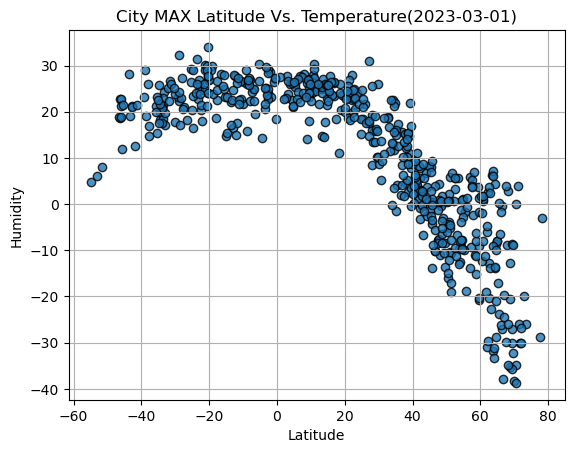

In [28]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
Temp = city_data_df["Max Temp"]

plt.scatter(latitude,
            Temp,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City MAX Latitude Vs. Temperature(%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

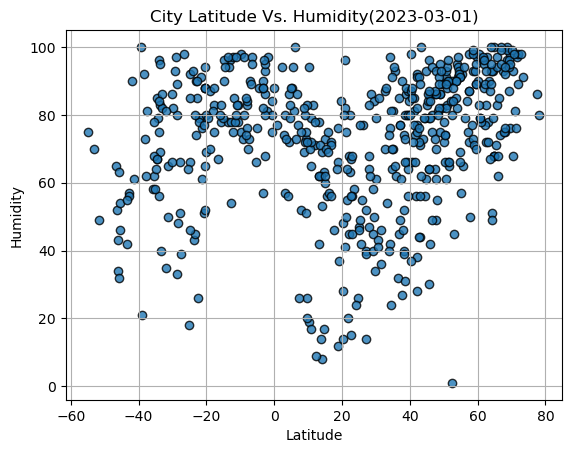

In [25]:
# Build scatter plot for latitude vs. Humidity
latitude = city_data_df["Lat"]
Temp = city_data_df["Humidity"]

plt.scatter(latitude,
            Temp,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude VS. Humidity(%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

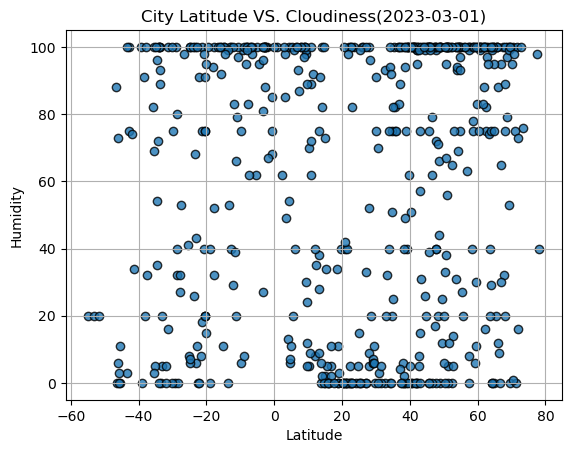

In [29]:
# Build scatter plot for latitude vs. Humidity
latitude = city_data_df["Lat"]
Temp = city_data_df["Cloudiness"]

plt.scatter(latitude,
            Temp,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude VS. Cloudiness(%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

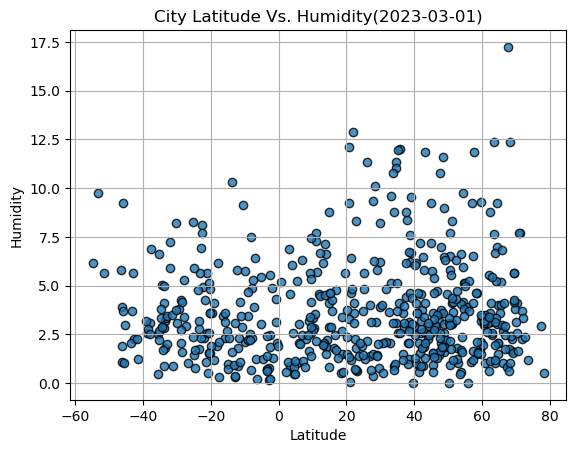

In [30]:
# Build scatter plot for latitude vs. Humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Wind Speed"]

plt.scatter(latitude,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude VS. Wind Speed(%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [31]:
# Define a function to create Linear Regression plots
city_lat = city_data_df['Lat']
max_temp_y = city_data_df['Max Temp']
humidity_y = city_data_df['Humidity']
cloudiness_y = city_data_df['Cloudiness']
wind_speed_y = city_data_df['Wind Speed']

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kapaa,22.0752,-159.3190,27.99,68,100,12.86,US,1677718456
2,qaanaaq,77.4840,-69.3632,-28.75,86,98,2.93,GL,1677718457
4,lompoc,34.6391,-120.4579,11.68,64,20,11.32,US,1677718458
5,kungurtug,50.5994,97.5228,-16.04,91,38,0.92,RU,1677718459
6,jamestown,42.0970,-79.2353,7.80,77,0,2.57,US,1677718335


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,21.14,57,75,5.66,AU,1677717904
3,kaitangata,-46.2817,169.8464,22.70,52,0,1.08,NZ,1677718458
11,new norfolk,-42.7826,147.0587,20.95,56,100,2.24,AU,1677718464
14,vaini,-21.2000,-175.2000,30.09,79,75,5.66,TO,1677718466
15,ushuaia,-54.8000,-68.3000,4.81,75,20,6.17,AR,1677718467


In [ ]:
###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8750068783681565


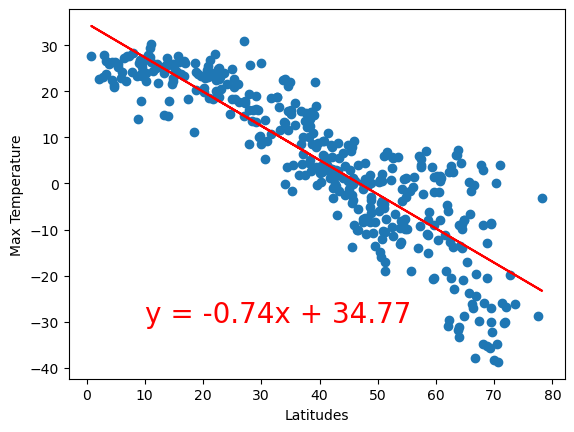

In [55]:
# Linear regression on Northern Hemisphere
from scipy.stats import linregress


northern_city_lat = northern_hemi_df['Lat']
northern_max_temp_y = northern_hemi_df['Max Temp']

# Perform linear regression on Northern Hemisphere latitudes and max temperatures
n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr = linregress(northern_city_lat, northern_max_temp_y)

# Create regression line data 
n_regression_values = n_slope * northern_city_lat + n_intercept

# Create line equation 
line_nth = f'y = {round(n_slope,2)}x + {round(n_intercept,2)}'

# scatter plot 
plt.scatter(northern_city_lat, northern_max_temp_y)

# Add linear regression line for Northern Hemisphere 
plt.plot(northern_city_lat, n_regression_values, "r-")

# Add title and labels 
plt.xlabel("Latitudes")
plt.ylabel("Max Temperature")
plt.annotate(line_nth, (10,-30), fontsize=20, color="red")

# Show the plot
print(f'The r-value is: {n_rvalue}')
plt.show()


The r-value is: 0.4162467263390674


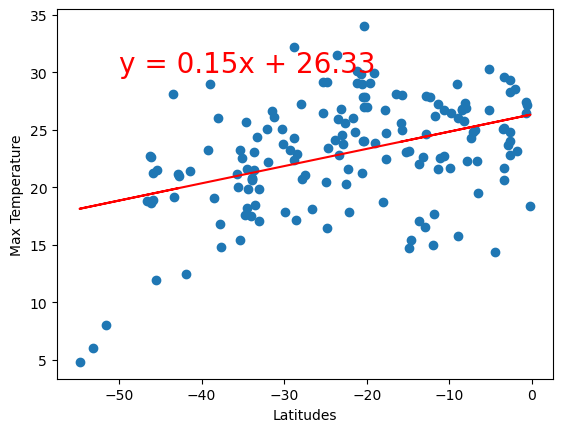

In [56]:
southern_city_lat = southern_hemi_df['Lat']
southern_max_temp_y = southern_hemi_df['Max Temp']

# Perform linear regression on Southern Hemisphere latitudes and max temperatures
s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr = linregress(southern_city_lat, southern_max_temp_y)

# Create regression line data 
s_regression_values = s_slope * southern_city_lat + s_intercept

# Create line equation 
line_sth = f'y = {round(s_slope,2)}x + {round(s_intercept,2)}'

# Create scatter plot 
plt.scatter(southern_city_lat, southern_max_temp_y)

# Add linear regression line 
plt.plot(southern_city_lat, s_regression_values, "r-")

# Add title and labels to plot for Southern Hemisphere latitudes and max temperatures
plt.xlabel("Latitudes")
plt.ylabel("Max Temperature")
plt.annotate(line_sth, (-50,30), fontsize=20, color="red")

# Show the plot
print(f'The r-value is: {s_rvalue}')
plt.show()

In [58]:
### Discussion: The temperature tends to increase as one gets closer to the Equator, indicating a strong relationship between the two variables. This suggests that geography plays a significant role in determining temperature, and areas closer to the Equator experience warmer climates compared to those further away. Additionally, other factors such as altitude, proximity to large bodies of water, and prevailing winds can also influence temperature patterns in a region.

In [ ]:
### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4345078018393377


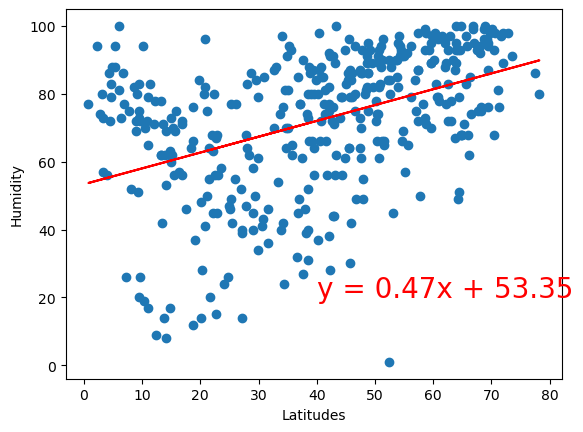

In [50]:
# Northern Hemisphere

# Create variables for Northern Hemisphere latitudes and humidity
northern_city_lat = northern_hemi_df['Lat']
northern_humidity = northern_hemi_df['Humidity']

# Perform linear regression 
n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr = linregress(northern_city_lat, northern_humidity)

# Create regression line data 
n_regression_values = n_slope * northern_city_lat + n_intercept

# Create line equation 
line_nth = f'y = {round(n_slope,2)}x + {round(n_intercept,2)}'

# scatter plot 
plt.scatter(northern_city_lat, northern_humidity)

# Add linear regression line for Northern Hemisphere 
plt.plot(northern_city_lat, n_regression_values, "r-")

# Add title and labels 

plt.xlabel("Latitudes")
plt.ylabel("Humidity")
plt.annotate(line_nth, (40,20), fontsize=20, color="red")

# Show the plot
print(f'The r-value is: {n_rvalue}')
plt.show()


The r-value is: 0.45428066700757497


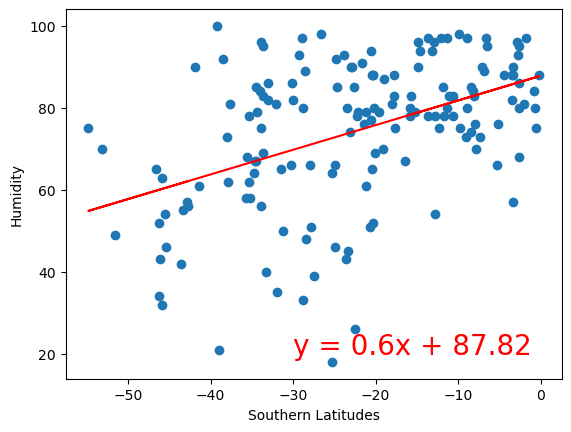

In [54]:
# Southern Hemisphere
# Create variables 
southern_city_lat = southern_hemi_df['Lat']
southern_humidity = southern_hemi_df['Humidity']

# Perform linear regression 
s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr = linregress(southern_city_lat, southern_humidity)

# Create regression line data 
s_regression_values = s_slope * southern_city_lat + s_intercept

# Create line equation 
line_sth = f'y = {round(s_slope,2)}x + {round(s_intercept,2)}'

# Create scatter plot 
plt.scatter(southern_city_lat, southern_humidity)

# Add linear regression line 
plt.plot(southern_city_lat, s_regression_values, "r-")

# Add title and labels to plot 
plt.xlabel("Latitudes")
plt.ylabel("Humidity")
plt.annotate(line_sth, (-30,20), fontsize=20, color="red")

# Show the plot
print(f'The r-value is: {s_rvalue}')
plt.show()


In [ ]:
### **Discussion about the linear relationship:** In the case of the first code, the negative slope of the line indicates that as you move further away from the equator, the maximum temperature decreases. Similarly, in the second code, the positive slope of the line indicates that as you move closer to the equator, the humidity generally increases.

The r-value is: 0.23379980353709137


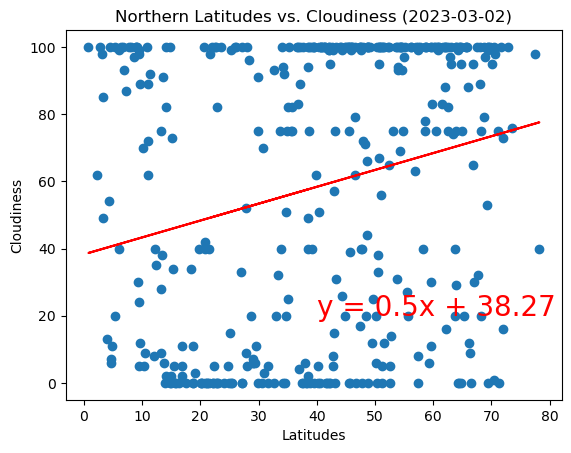

In [59]:
# Create variables for Northern Hemisphere latitudes and cloudiness
northern_city_lat = northern_hemi_df['Lat']
northern_cloudiness = northern_hemi_df['Cloudiness']

# Perform linear regression 
n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr = linregress(northern_city_lat, northern_cloudiness)

# Create regression line data 
n_regression_values = n_slope * northern_city_lat + n_intercept

# Create line equation 
line_nth = f'y = {round(n_slope,2)}x + {round(n_intercept,2)}'

# scatter plot 
plt.scatter(northern_city_lat, northern_cloudiness)

# Add linear regression line for Northern Hemisphere 
plt.plot(northern_city_lat, n_regression_values, "r-")

# Add title and labels 
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness")
plt.annotate(line_nth, (40,20), fontsize=20, color="red")

# Show the plot
print(f'The r-value is: {n_rvalue}')
plt.show()


The r-value is: 0.37970517863120085


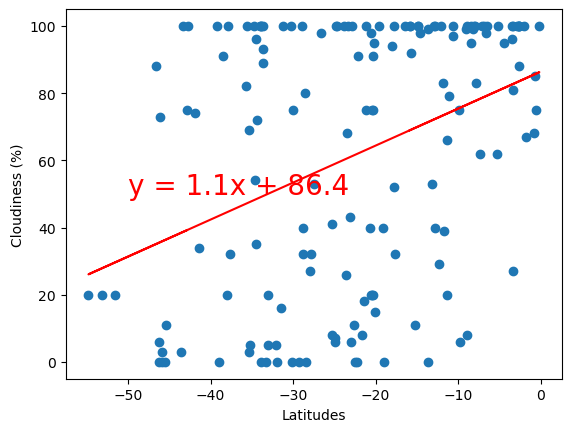

In [62]:
# Create variables for Southern Hemisphere latitudes and cloudiness
southern_city_lat = southern_hemi_df['Lat']
southern_cloudiness = southern_hemi_df['Cloudiness']

# Perform linear regression 
s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr = linregress(southern_city_lat, southern_cloudiness)

# Create regression line data 
s_regression_values = s_slope * southern_city_lat + s_intercept

# Create line equation 
line_sth = f'y = {round(s_slope,2)}x + {round(s_intercept,2)}'

# scatter plot 
plt.scatter(southern_city_lat, southern_cloudiness)

# Add linear regression line for Southern Hemisphere 
plt.plot(southern_city_lat, s_regression_values, "r-")

# Add title and labels 

plt.xlabel("Latitudes")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_sth, (-50,50), fontsize=20, color="red")

# Show the plot
print(f'The r-value is: {s_rvalue}')
plt.show()


In [ ]:
###Discussion: it doesn't seem to be a correlation between a location's distance from the Equator and its level of cloudiness. However, it is important to note that this conclusion is specific to the data and time frame studied and may not necessarily be representative of all locations and time periods. Additionally, other factors not considered in the analysis could potentially affect cloudiness levels in different regions.

In [ ]:
### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03462285255747119


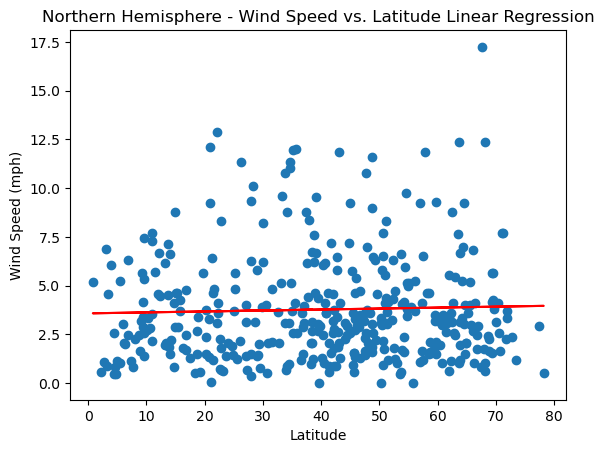

In [63]:
# Northern Hemisphere
# Create variables for Northern Hemisphere latitudes and wind speed
northern_city_lat = northern_hemi_df['Lat']
northern_wind_speed = northern_hemi_df['Wind Speed']

# Perform linear regression 
n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr = linregress(northern_city_lat, northern_wind_speed)

# Create regression line data 
n_regression_values = n_slope * northern_city_lat + n_intercept

# Create line equation 
line_nth = f'y = {round(n_slope,2)}x + {round(n_intercept,2)}'

# scatter plot 
plt.scatter(northern_city_lat, northern_wind_speed)

# Add linear regression line for Northern Hemisphere 
plt.plot(northern_city_lat, n_regression_values, "r-")

# Add title and labels 
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_nth, (10,20), fontsize=15, color="red")

# Show the plot
print(f'The r-value is: {n_rvalue}')
plt.show()


The r-value is: -0.2037399450414632


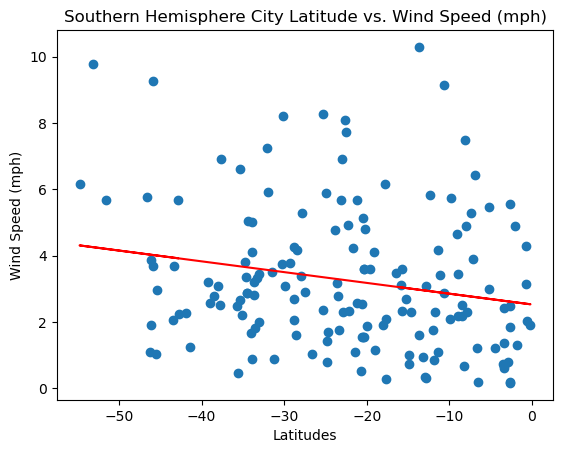

In [64]:
# Create variables for Southern Hemisphere latitudes and wind speed
southern_city_lat = southern_hemi_df['Lat']
southern_wind_speed = southern_hemi_df['Wind Speed']

# Perform linear regression 
s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr = linregress(southern_city_lat, southern_wind_speed)

# Create regression line data 
s_regression_values = s_slope * southern_city_lat + s_intercept

# Create line equation 
line_south = f'y = {round(s_slope,2)}x + {round(s_intercept,2)}'

# scatter plot 
plt.scatter(southern_city_lat, southern_wind_speed)

# Add linear regression line for Southern Hemisphere 
plt.plot(southern_city_lat, s_regression_values, "r-")

# Add title and labels 
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitudes")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_south, (-50, 20), fontsize=20, color="red")

# Show the plot
print(f'The r-value is: {s_rvalue}')
plt.show()


In [ ]:
### Discussion: there is no significant correlation between wind speed and proximity to the Equator. It implies that being near or far from the Equator does not affect wind speed to a noticeable extent. However, it is possible that there are other factors that influence wind speed that are not related to latitude.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import sys
sys.path.append('/Users/majosegarciamontes/Desktop/')

city_data = '/Users/majosegarciamontes/Desktop/cities.csv'
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key



# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy